# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [14]:
library("tidyverse")
options(repr.plot.res = 300, repr.plot.width = 4, repr.plot.height = 4)
WindTurbin = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-10-27/wind-turbine.csv", 
                      show_col_types = FALSE)

WindTurbin |> glimpse()

Rows: 6,698
Columns: 15
$ objectid                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ province_territory         <chr> "Alberta", "Alberta", "Alberta", "Alberta",…
$ project_name               <chr> "Optimist Wind Energy", "Castle River Wind …
$ total_project_capacity_mw  <dbl> 0.90, 44.00, 3.78, 3.78, 3.78, 3.78, 19.50,…
$ turbine_identifier         <chr> "OWE1", "CRW1", "WWT1", "WWT2", "WWT3", "WW…
$ turbine_number_in_project  <chr> "1/2", "1/60", "1/6", "2/6", "3/6", "4/6", …
$ turbine_rated_capacity_k_w <dbl> 150, 600, 600, 600, 600, 660, 1300, 1300, 1…
$ rotor_diameter_m           <dbl> 23, 44, 44, 44, 44, 47, 60, 60, 60, 60, 60,…
$ hub_height_m               <dbl> 30, 40, 50, 50, 50, 50, 46, 46, 46, 46, 46,…
$ manufacturer               <chr> "Bonus", "Vestas", "Vestas", "Vestas", "Ves…
$ model                      <chr> "AN 150/30", "V44/600", "V44/600", "V44/600…
$ commissioning_date         <chr> "1993", "1997", "1998", "1998", "1998", "20…
$ latitude      

Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

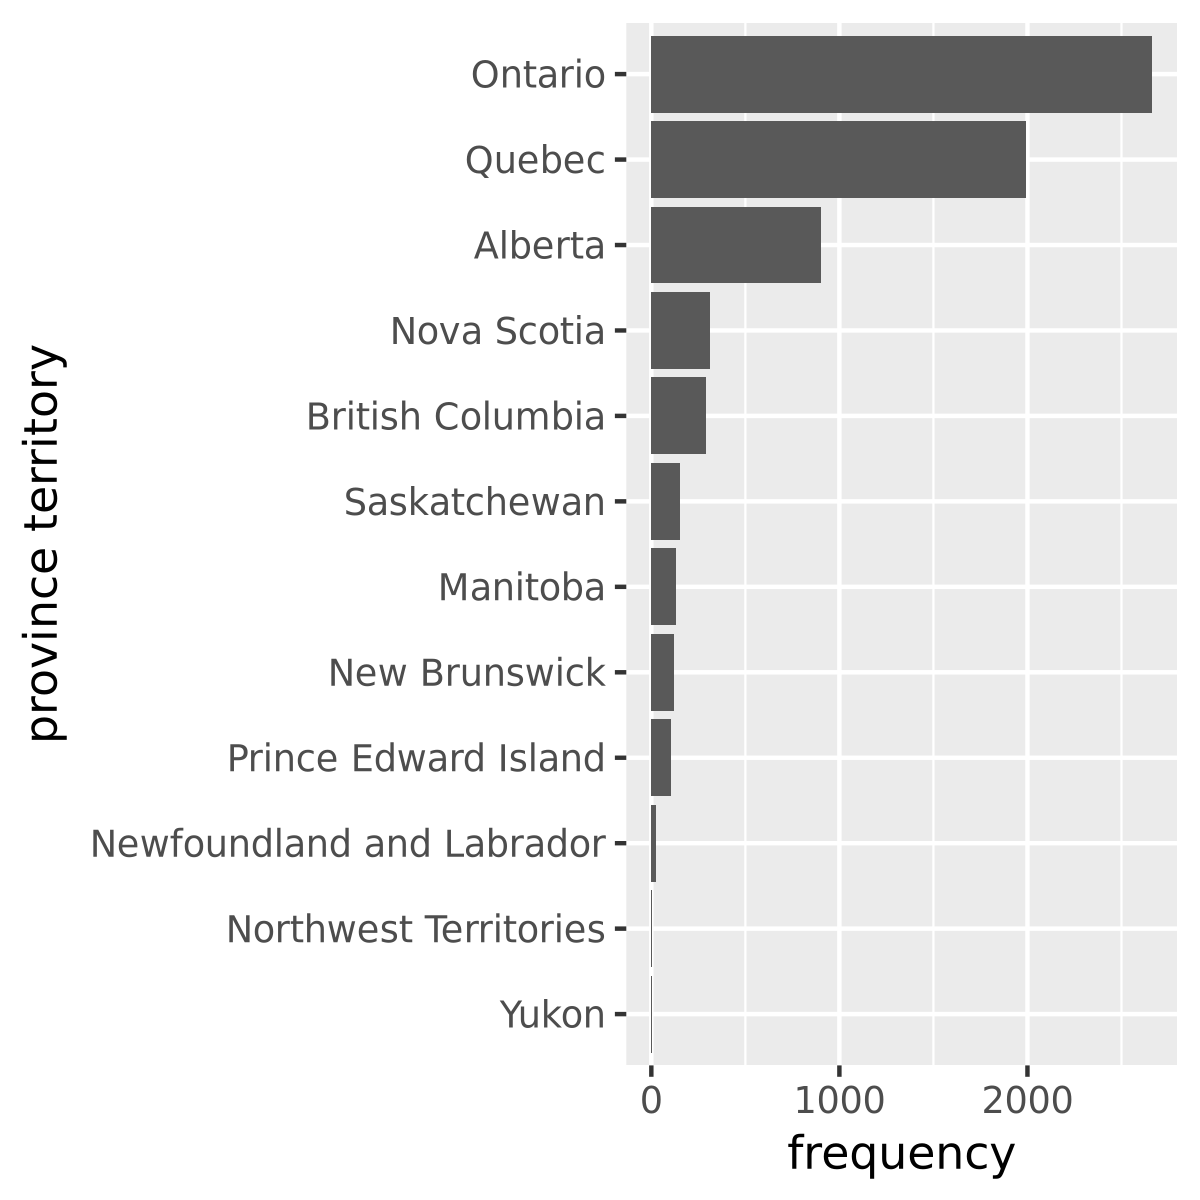

In [15]:
WindTurbin |>
    mutate(province_territory = fct_infreq(province_territory) |> fct_rev()) |>
    ggplot(aes(y = province_territory)) + geom_bar() +
    labs(y = "province territory", x = "frequency") 

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

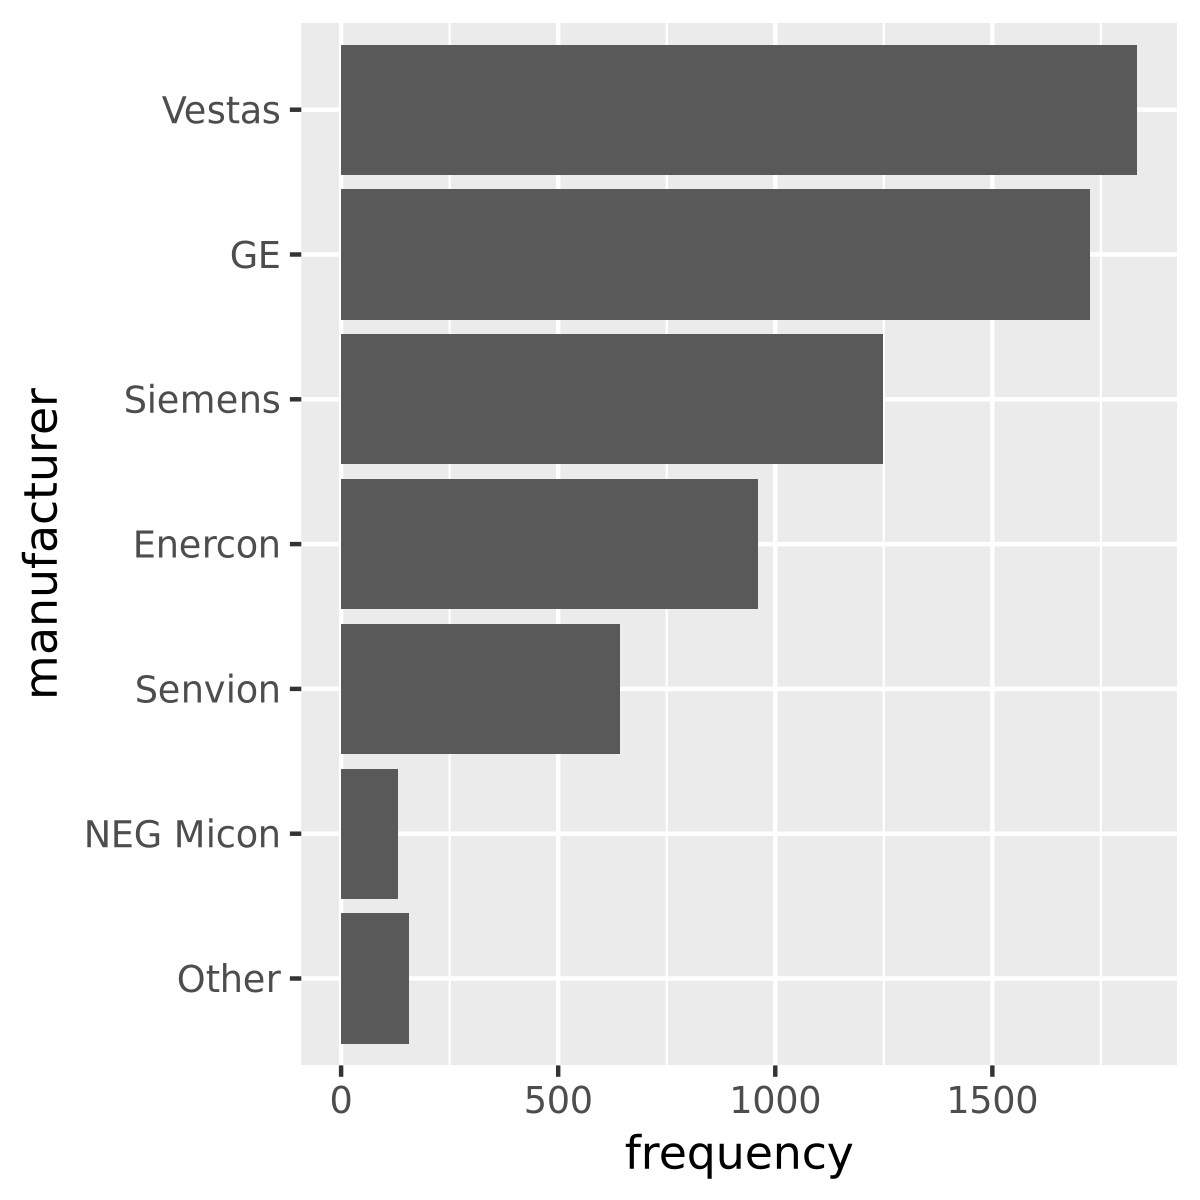

In [16]:
WindTurbin |>
    mutate(manufacturer = fct_lump(manufacturer, n=6) |>
           fct_infreq() |>
           fct_relevel('Other' , after = Inf)|>
           fct_rev())|>
    ggplot(aes(y = manufacturer)) + geom_bar() +
    labs(y = "manufacturer", x = "frequency") 

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [17]:
library("maps")

Now we can retrieve the "data" for a map of Canada. Run this code:

In [18]:
canada = map_data('world', region='Canada')  

Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

In [19]:
WindTurbin = WindTurbin |>
    rename(long = longitude, lat = latitude)

names(WindTurbin)

[1] "objectid"                   "province_territory"        
 [3] "project_name"               "total_project_capacity_mw" 
 [5] "turbine_identifier"         "turbine_number_in_project" 
 [7] "turbine_rated_capacity_k_w" "rotor_diameter_m"          
 [9] "hub_height_m"               "manufacturer"              
[11] "model"                      "commissioning_date"        
[13] "lat"                        "long"                      
[15] "notes"

The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

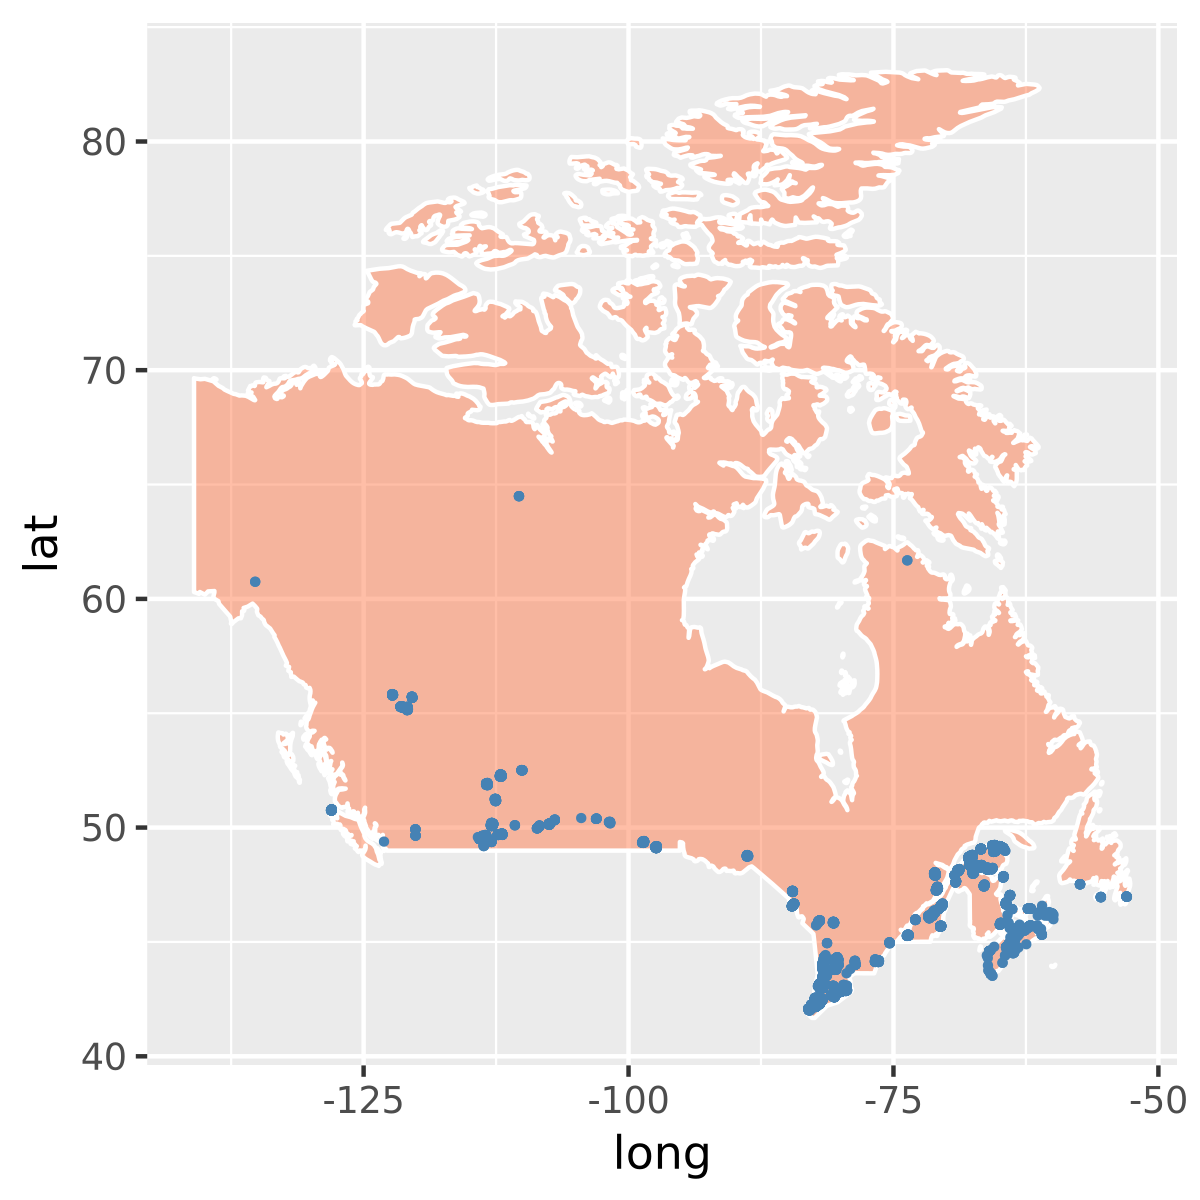

In [20]:
ggplot(data = canada) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap()+
    geom_point(data = WindTurbin, aes(x = long, y = lat), color = "steelblue", size = 0.5)